# PROJECT OBJECTIVE: Predict the customer churn 

In [1]:
## Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
## Lets import the data

data_df=pd.read_csv('WA_Fn_UseC_Telco-Customer-Churn.csv')

In [3]:
##Checking to see if the data has been imported successfully

data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## Checking the Shape of the Data

data_df.shape

## There are 7043 rows and 21 columns in the dataset

(7043, 21)

In [5]:
## DTYPES of the Columns

data_df.dtypes

## We can see that there are many data types as objects which we will need to convert to numeric during further building

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
## Changing the Total Charges column from Object to Numeric as it has numeric data

data_df['TotalCharges']=pd.to_numeric(data_df['TotalCharges'],errors='coerce')

## Calling the dtype function to confirm the change of the datatype for Total Charges

data_df['TotalCharges'].dtypes

## The Datatype has been converted to numeric


dtype('float64')

In [7]:
## Looking at the unique values for all the columns

for i in data_df.columns:
    print(f" Unique{i}'s count: {data_df[i].nunique()}")
    print(f" {data_df[i].unique()}\n")

 UniquecustomerID's count: 7043
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 Uniquegender's count: 2
 ['Female' 'Male']

 UniqueSeniorCitizen's count: 2
 [0 1]

 UniquePartner's count: 2
 ['Yes' 'No']

 UniqueDependents's count: 2
 ['No' 'Yes']

 Uniquetenure's count: 73
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 UniquePhoneService's count: 2
 ['No' 'Yes']

 UniqueMultipleLines's count: 3
 ['No phone service' 'No' 'Yes']

 UniqueInternetService's count: 3
 ['DSL' 'Fiber optic' 'No']

 UniqueOnlineSecurity's count: 3
 ['No' 'Yes' 'No internet service']

 UniqueOnlineBackup's count: 3
 ['Yes' 'No' 'No internet service']

 UniqueDeviceProtection's count: 3
 ['No' 'Yes' 'No internet service']

 UniqueTechSupport's count: 3
 ['No' 'Yes' 'No internet service']

 Unique

In [8]:
## Checking for missing Values

data_df.isnull().sum()

## We have a total of 11 null values in the Total Charges column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
## DESCRIPTIVE ANALYSIS

## The reason for less columns showing in describe is because we have many columns with the DataType as Object which need to converted to Numeric


In [10]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [11]:
## Duplicate Check


In [12]:
data_df.duplicated().sum()

0

In [13]:
## There are no duplicates in the data

In [14]:
## The data is imbalanced data and needs to be balanced which will be done during featue selection and engineering

In [15]:
data_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
## Deleting the Redundant column Customer ID as we cant make any changes on the same

In [17]:
data_df=data_df.drop(['customerID'],axis=1)

In [18]:
data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
## We need to take care of the Output i.e. Churn. We need to map the values and cast them to the Columns

## We can see the values are now in 0's and 1's

In [20]:
churn_map = {'No': 0, 'Yes': 1}
data_df['Churn'] = data_df['Churn'].map(churn_map)
data_df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [21]:
data_df['Churn'].isnull().sum()

0

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
## Using One Hot Encoding to convert all the Object Datatypes to Numeric

In [24]:
data_df_dummy=pd.get_dummies(data_df)

In [25]:
data_df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [26]:
## Group 1--Fins out the customer info with Churn

In [27]:
data_df_dummy.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [28]:
data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [29]:
## Customer Information with respect to Churn. 

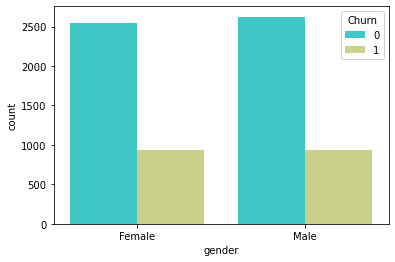

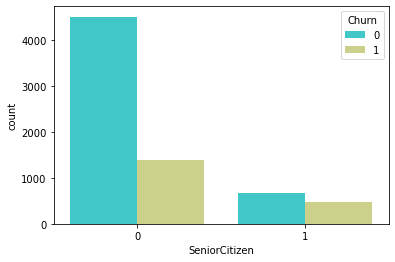

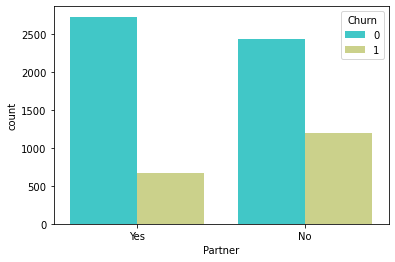

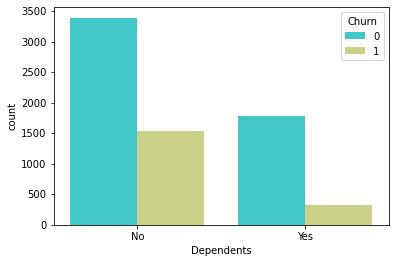

In [30]:
C1=data_df[['gender','SeniorCitizen','Partner','Dependents']]

for i in C1:
    plt.figure(i)
    sns.countplot(data=data_df,x=i,hue='Churn',palette='rainbow')

In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [32]:
## CUSTOMER INFORMATION

gender=data_df[data_df['Churn']==1]['gender'].value_counts()
gender=[gender[0]/sum(gender)*100,gender[1]/sum(gender)*100]

Seniorcitizen=data_df[data_df['Churn']==1]['SeniorCitizen'].value_counts()
Seniorcitizen=[Seniorcitizen[0]/sum(Seniorcitizen)*100,Seniorcitizen[1]/sum(Seniorcitizen)*100]

Partner=data_df[data_df['Churn']==1]['Partner'].value_counts()
Partner=[Partner[0]/sum(Partner)*100,Partner[1]/sum(Partner)*100]

Dependents=data_df[data_df['Churn']==1]['Dependents'].value_counts()
Dependents=[Dependents[0]/sum(Dependents)*100,Dependents[1]/sum(Dependents)*100]


In [33]:
print(gender)
print(Seniorcitizen)
print(Partner)
print(Dependents)

[50.24077046548957, 49.75922953451043]
[74.53183520599251, 25.468164794007492]
[64.20545746388443, 35.79454253611557]
[82.55751738897807, 17.442482611021937]


<AxesSubplot:>

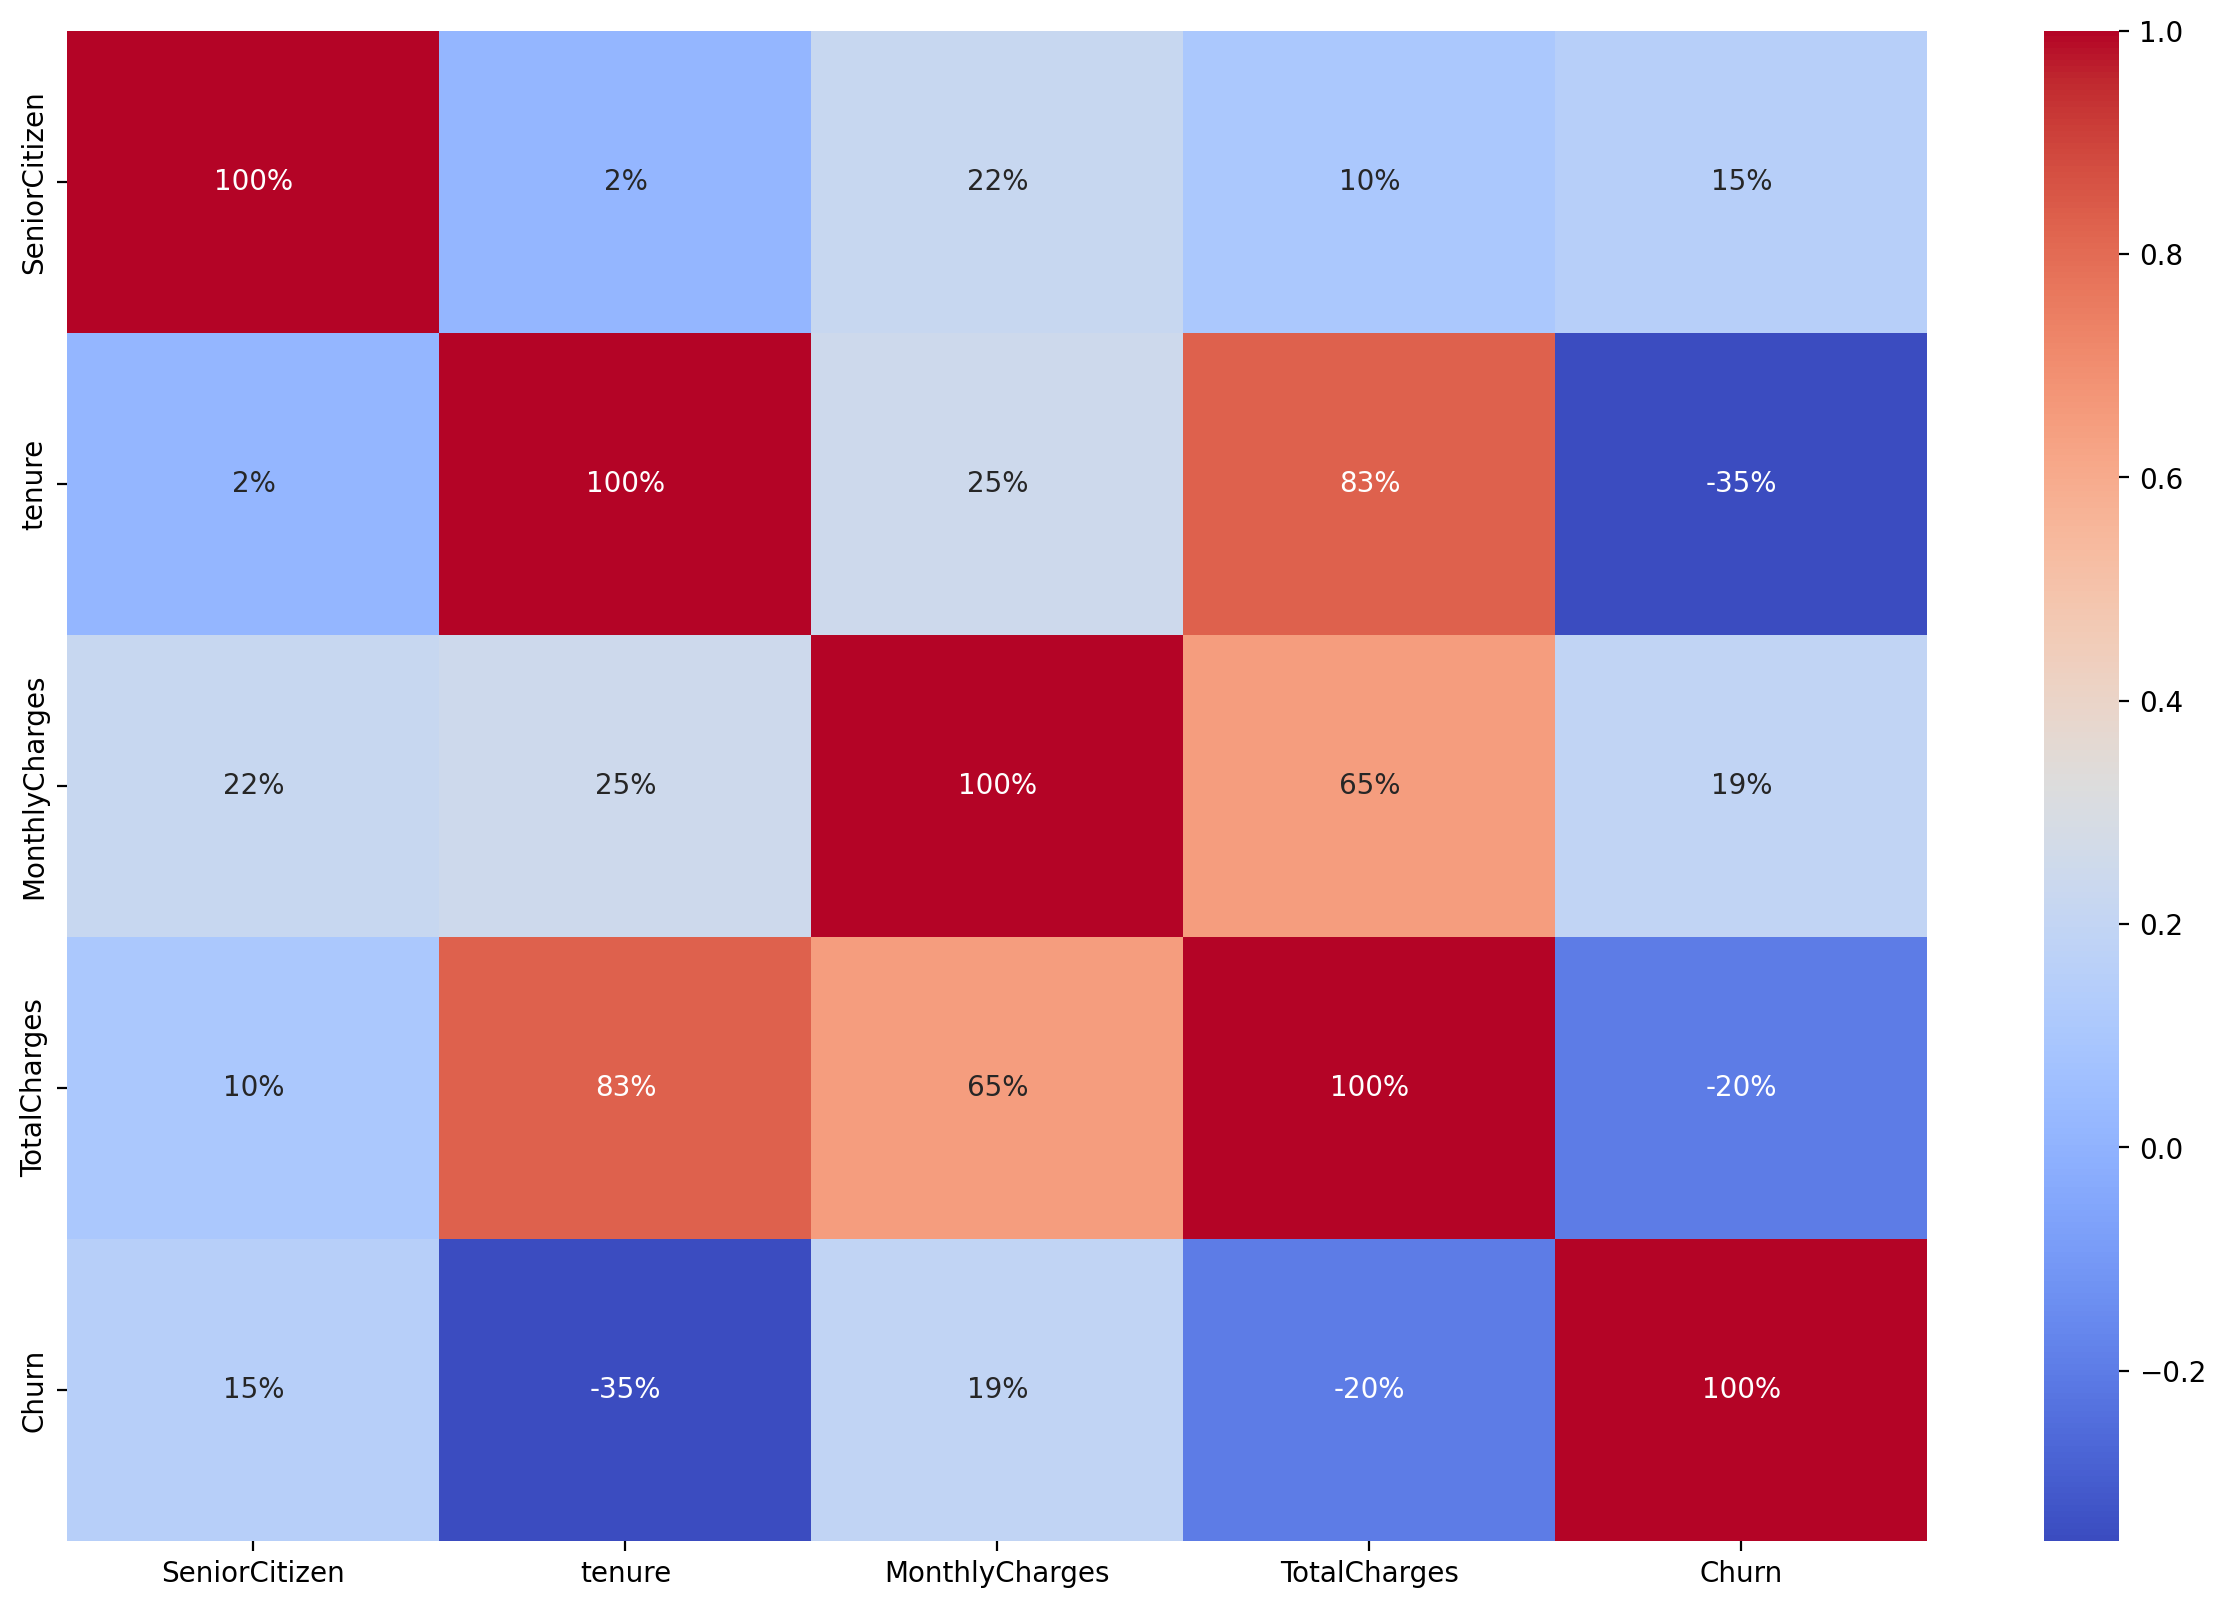

In [34]:
plt.figure(figsize=(15,10),dpi=200)
sns.heatmap(data_df.corr(),annot=True,cmap='coolwarm',fmt='.0%')

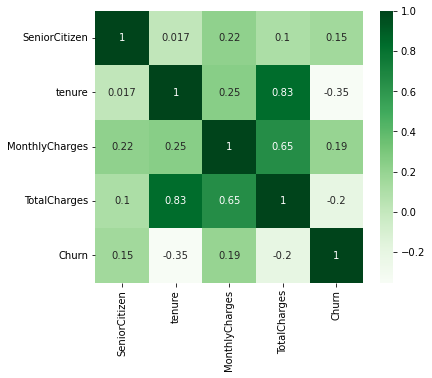

In [35]:
plt.figure(figsize=(6,5))
sns.heatmap(data_df.corr(), annot = True, cmap = "Greens");

In [36]:
data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [37]:
#We see that the columns are of uint8 type and we need them as floats or integers


In [38]:
for column_name in data_df_dummy.columns:
    data_df_dummy[column_name] = data_df_dummy[column_name].astype(float)
data_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7043 non-null   float64
 5   gender_Female                            7043 non-null   float64
 6   gender_Male                              7043 non-null   float64
 7   Partner_No                               7043 non-null   float64
 8   Partner_Yes                              7043 non-null   float64
 9   Dependents_No                            7043 non-null   float64
 10  Dependents_Yes                           7043 no

In [39]:
data_df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
#We will make a barplot of the correlated features


In [43]:
values = data_df_dummy.corr()['Churn'].sort_values(ascending=False)[1:].values
index = data_df_dummy.corr()['Churn'].sort_values(ascending=False)[1:].index

In [44]:
#Now we will create the plot

In [97]:
palette = 'Set1'

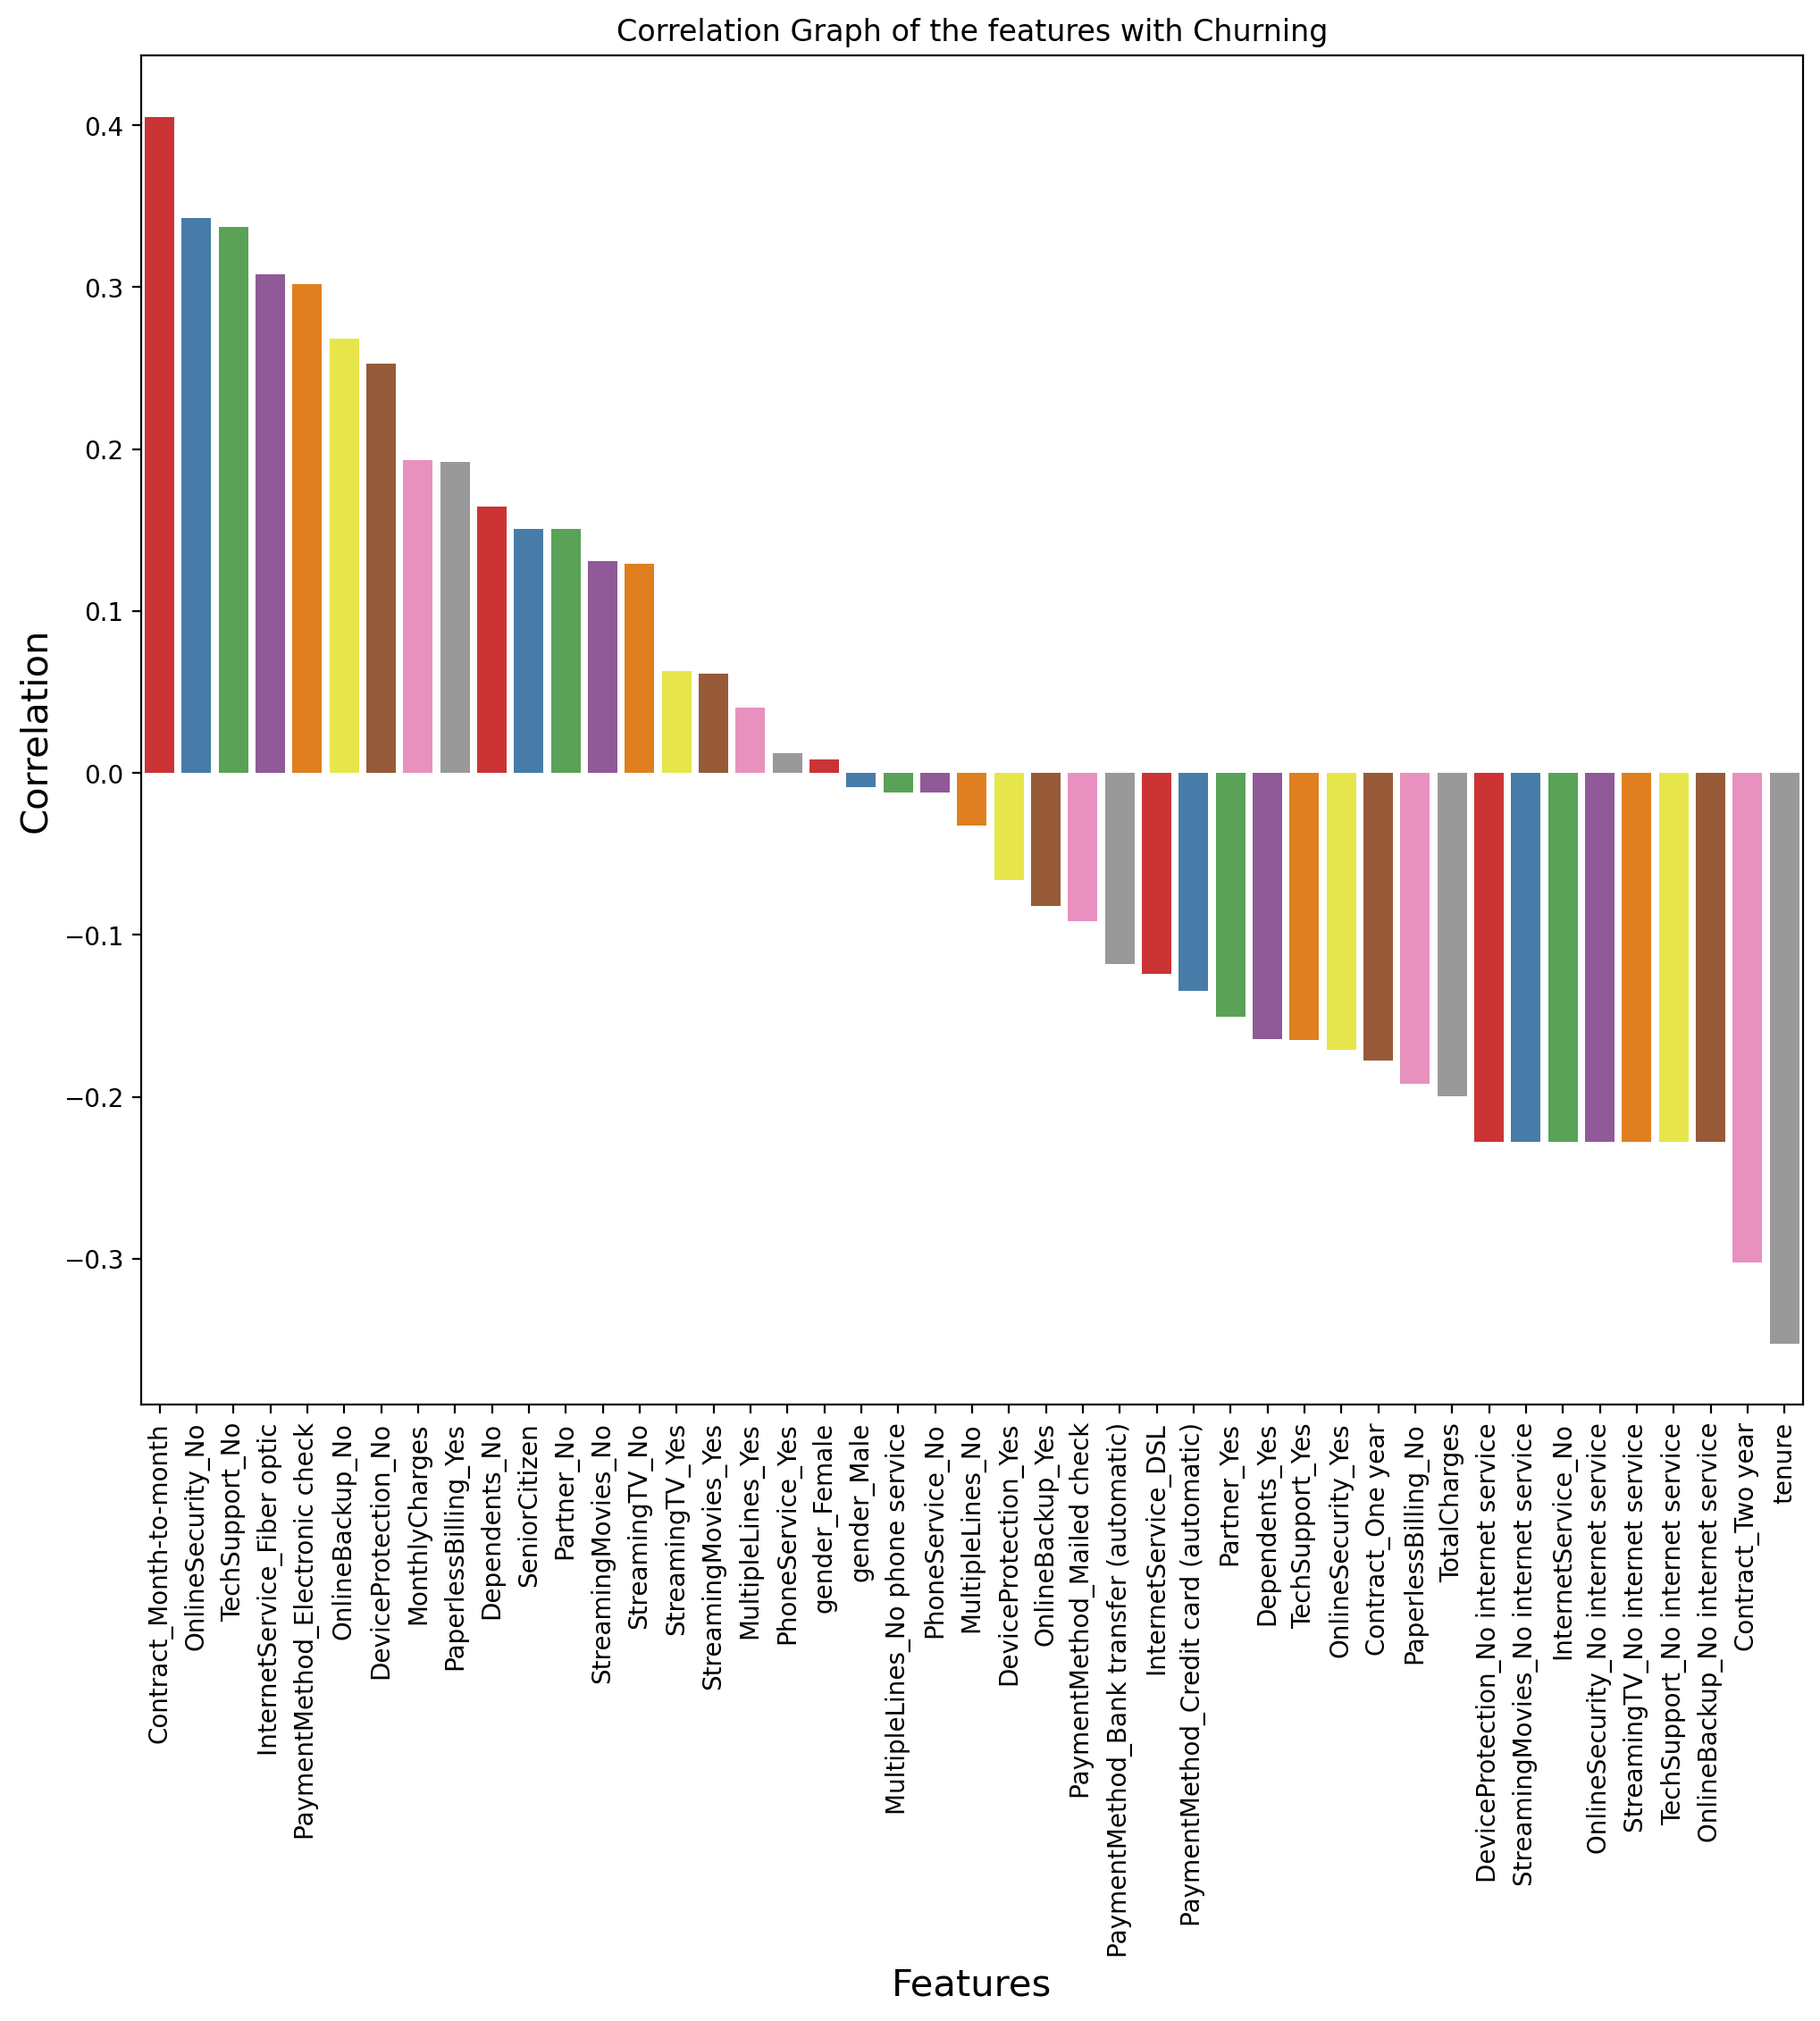

In [98]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)
sns.barplot(x=index, y=values, palette=palette,ax=ax)
plt.xticks(rotation=90)
plt.title('Correlation Graph of the features with Churning')
plt.ylabel('Correlation', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.show()

In [47]:
## Lets check the number of Senior Citizens in the dataset

elderly_count=data_df_dummy['SeniorCitizen'].value_counts()

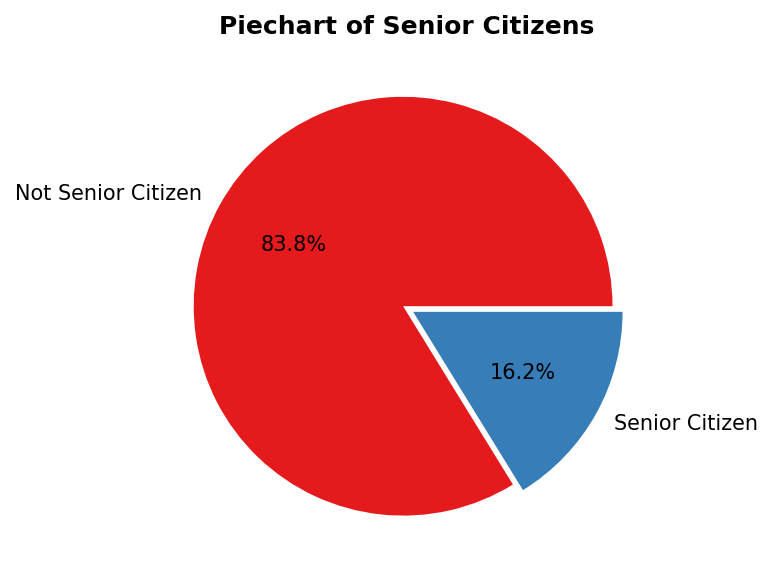

In [48]:
#Now we will create the figure
colors = sns.color_palette('Set1')
explode = [0.02, 0.035]
labels = elderly_count.unique()

plt.figure(figsize=(5, 4), dpi=150, facecolor='white')
plt.pie(elderly_count, labels=['Not Senior Citizen', 'Senior Citizen'], colors=colors, 
       explode=explode, autopct='%1.1f%%')
plt.title('Piechart of Senior Citizens', fontweight='bold')
plt.tight_layout()
plt.show()

## Let's now explore the churn rate for all the customers

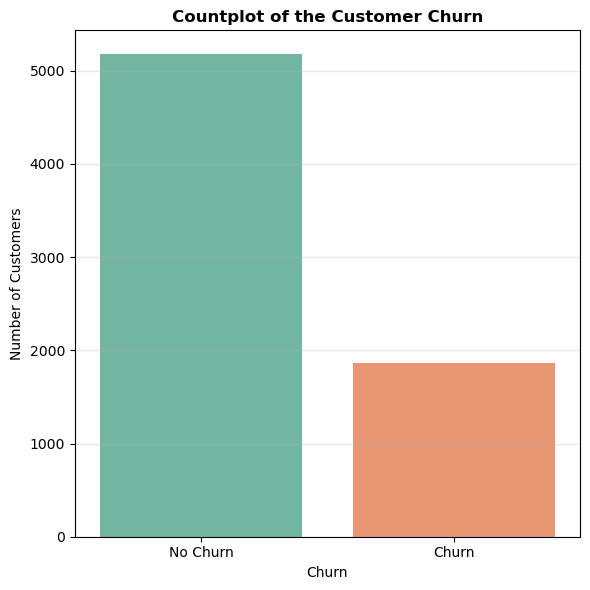

In [49]:
churning_clients = data_df_dummy['Churn'].value_counts()

#making the plot

sns.set_palette('Set2')

plt.figure(figsize=(6, 6), dpi=100)
ax = sns.barplot(x=churning_clients.index.map({1:'Churn', 0:'No Churn'}), y=churning_clients.values)
plt.title('Countplot of the Customer Churn', fontweight='bold')
plt.grid(axis='y', linewidth=1, alpha=0.3)
plt.ylabel('Number of Customers')
plt.xlabel('Churn')

plt.tight_layout()
plt.show()

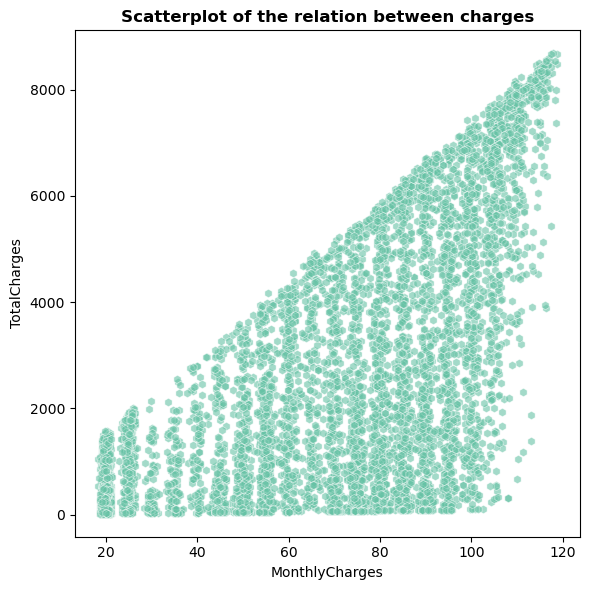

In [50]:
## Checking the Correlation between the Monthly Charges and Total Charges

plt.figure(figsize=(6, 6), dpi=100)
sns.scatterplot(data=data_df_dummy, x='MonthlyCharges', y='TotalCharges', alpha=0.6, marker='h')
plt.title('Scatterplot of the relation between charges', fontweight='bold')
plt.tight_layout()
plt.show()

#Useful Insight
We can see that there is a postiive correlation. If the Monthly charges are more the total charges will also be more

In [51]:
## Calculating the Numerical Features so that we can peform the Outlier check

numerical_feature=[feature for feature in data_df_dummy.columns if data_df_dummy[feature].dtypes!='O']
print('Number of Numerical Features:', len(numerical_feature))


Number of Numerical Features: 46


In [52]:
## using the Mean to impute the missing value in total Charges

data_df_dummy['TotalCharges']=data_df_dummy['TotalCharges'].fillna(data_df_dummy['TotalCharges'].mean())

In [53]:
data_df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
## Splitting the data into X_train ,y_train using Train test Split

X=data_df_dummy.drop(['Churn'],axis=1)
y=data_df_dummy['Churn']

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   float64
 5   gender_Male                              7043 non-null   float64
 6   Partner_No                               7043 non-null   float64
 7   Partner_Yes                              7043 non-null   float64
 8   Dependents_No                            7043 non-null   float64
 9   Dependents_Yes                           7043 non-null   float64
 10  PhoneService_No                          7043 no

In [56]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [57]:
from sklearn. model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [59]:
## Standardization using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.fit_transform(X_test)

In [61]:
scaled_X_test.shape

(1409, 45)

MODEL BUILDING AFTER USING STANDARDIZATION

In [62]:
## Importing the Logistic Regression Algorithm as this is a classification problem

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() 

In [63]:
## Fitting the X_train and Y_train on the model

model1=lr.fit(scaled_X_train,y_train)

In [64]:
y_pred=model1.predict(scaled_X_test)

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



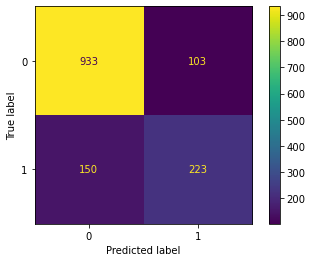

In [67]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [68]:
## Running modal with RandomForest classification problem

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [70]:
## Fitting the X_train and Y_train on the model

model2=rf.fit(scaled_X_train,y_train)

In [71]:
y_pred_mod2=model2.predict(scaled_X_test)

In [72]:
print(classification_report(y_test,y_pred_mod2))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1036
         1.0       0.68      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



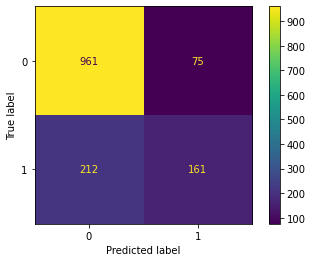

In [101]:
cm1 = confusion_matrix(y_test,y_pred_mod2)
display = ConfusionMatrixDisplay(cm1)
display.plot()
plt.show()


In [74]:
## Running the Model with Decision Tree  classification problem

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [75]:
## Fitting the X_train and Y_train on the model

model3=dt.fit(scaled_X_train,y_train)

In [76]:
y_pred_mod3=dt.predict(scaled_X_test)

In [77]:
print(classification_report(y_test,y_pred_mod3))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1036
         1.0       0.46      0.43      0.44       373

    accuracy                           0.71      1409
   macro avg       0.63      0.62      0.63      1409
weighted avg       0.71      0.71      0.71      1409



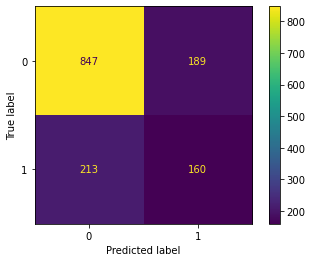

In [102]:
cm2 = confusion_matrix(y_test,y_pred_mod3)
display = ConfusionMatrixDisplay(cm2)
display.plot()
plt.show()

In [79]:
## KNN Classification pproblem

from sklearn.neighbors import KNeighborsClassifier 

In [80]:
model4=KNeighborsClassifier(n_neighbors=14)

In [81]:
model4.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [82]:
y_pred_knn=model4.predict(scaled_X_test)

In [83]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1036
         1.0       0.62      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [84]:
cm4=confusion_matrix(y_pred_knn,y_pred)

In [103]:
cm4

array([[1022,   95],
       [  61,  231]], dtype=int64)

In [86]:
#test_error_rates

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
test_error_rates=[]
for k in range(1,30):
    model5=KNeighborsClassifier(n_neighbors=k)
    model5.fit(scaled_X_train,y_train)
    y_pred_test=model5.predict(scaled_X_test)
    test_error=1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Neighbors')

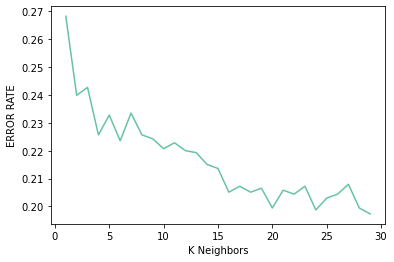

In [89]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [90]:
## Running ROC Curve for all models.

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

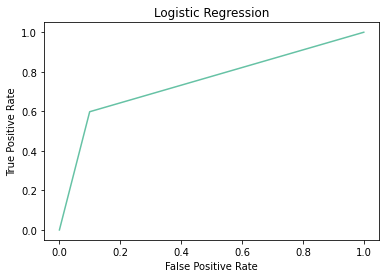

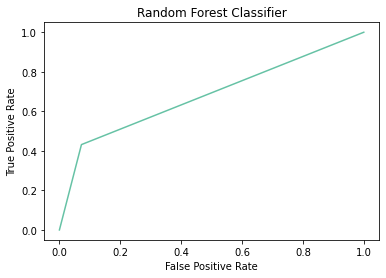

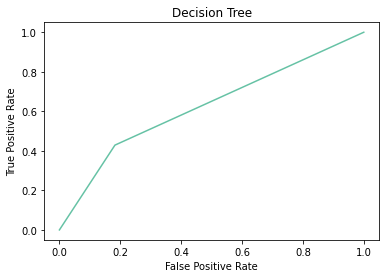

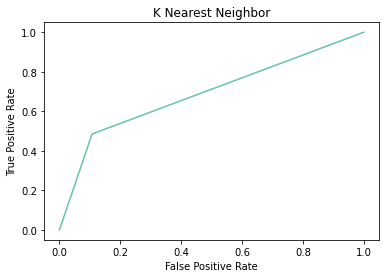

In [92]:
FPR,TPR,_=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression')
plt.show()

FPR,TPR,_=roc_curve(y_test,y_pred_mod2)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

FPR,TPR,_=roc_curve(y_test,y_pred_mod3)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree')
plt.show()

FPR,TPR,_=roc_curve(y_test,y_pred_knn)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K Nearest Neighbor')
plt.show()
